In [20]:
import yfinance as yf
from datetime import datetime

now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)

# Redownload the original data
df = yf.download("AAPL", start=start, end=now)


/var/folders/hp/3283kxw545l9z5znznglm25w0000gn/T/ipykernel_15912/3093078847.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start=start, end=now)
[*********************100%***********************]  1 of 1 completed


In [21]:
df

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-07-06   28.219818   28.271331   27.962256   27.982414  112241600
2015-07-07   28.150400   28.253425   27.720382   28.195193  187787200
2015-07-08   27.451609   27.915220   27.444890   27.879386  243046400
2015-07-09   26.891701   27.785328   26.701329   27.738295  314380000
2015-07-10   27.610630   27.738291   27.147019   27.310515  245418000
...                ...         ...         ...         ...        ...
2025-06-27  201.080002  203.220001  200.000000  201.889999   73188600
2025-06-30  205.169998  207.389999  199.259995  202.009995   91912800
2025-07-01  207.820007  210.190002  206.139999  206.669998   78788900
2025-07-02  212.440002  213.339996  208.139999  208.910004   67941800
2025-07-03  213.550003  214.649994  211.809998  212.149994   34955800

[2515 rows x 5 columns]

In [22]:
df = df.reset_index() 

In [23]:
df

Price        Date       Close        High         Low        Open     Volume
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL
0      2015-07-06   28.219818   28.271331   27.962256   27.982414  112241600
1      2015-07-07   28.150400   28.253425   27.720382   28.195193  187787200
2      2015-07-08   27.451609   27.915220   27.444890   27.879386  243046400
3      2015-07-09   26.891701   27.785328   26.701329   27.738295  314380000
4      2015-07-10   27.610630   27.738291   27.147019   27.310515  245418000
...           ...         ...         ...         ...         ...        ...
2510   2025-06-27  201.080002  203.220001  200.000000  201.889999   73188600
2511   2025-06-30  205.169998  207.389999  199.259995  202.009995   91912800
2512   2025-07-01  207.820007  210.190002  206.139999  206.669998   78788900
2513   2025-07-02  212.440002  213.339996  208.139999  208.910004   67941800
2514   2025-07-03  213.550003  214.649994  211.809998  212.149994   34955800

[2515 rows x 6 columns]

Text(0, 0.5, 'price')

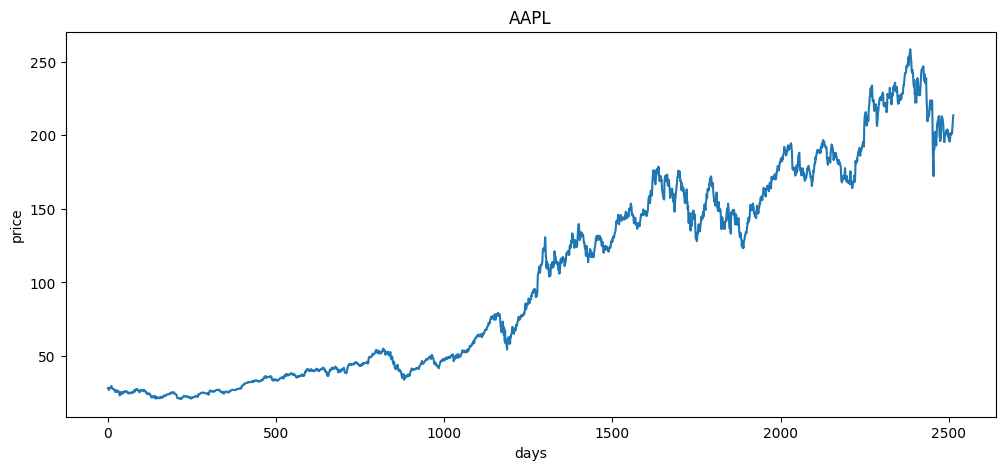

In [25]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('days')
plt.ylabel('price')

In [26]:
df['MA_100']=df.Close.rolling(100).mean()
df.head()

Price        Date      Close       High        Low       Open     Volume  \
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL   
0      2015-07-06  28.219818  28.271331  27.962256  27.982414  112241600   
1      2015-07-07  28.150400  28.253425  27.720382  28.195193  187787200   
2      2015-07-08  27.451609  27.915220  27.444890  27.879386  243046400   
3      2015-07-09  26.891701  27.785328  26.701329  27.738295  314380000   
4      2015-07-10  27.610630  27.738291  27.147019  27.310515  245418000   

Price  MA_100  
Ticker         
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [27]:
df.tail()

Price        Date       Close        High         Low        Open    Volume  \
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL   
2510   2025-06-27  201.080002  203.220001  200.000000  201.889999  73188600   
2511   2025-06-30  205.169998  207.389999  199.259995  202.009995  91912800   
2512   2025-07-01  207.820007  210.190002  206.139999  206.669998  78788900   
2513   2025-07-02  212.440002  213.339996  208.139999  208.910004  67941800   
2514   2025-07-03  213.550003  214.649994  211.809998  212.149994  34955800   

Price       MA_100  
Ticker              
2510    212.760757  
2511    212.490059  
2512    212.249153  
2513    212.046966  
2514    211.911644

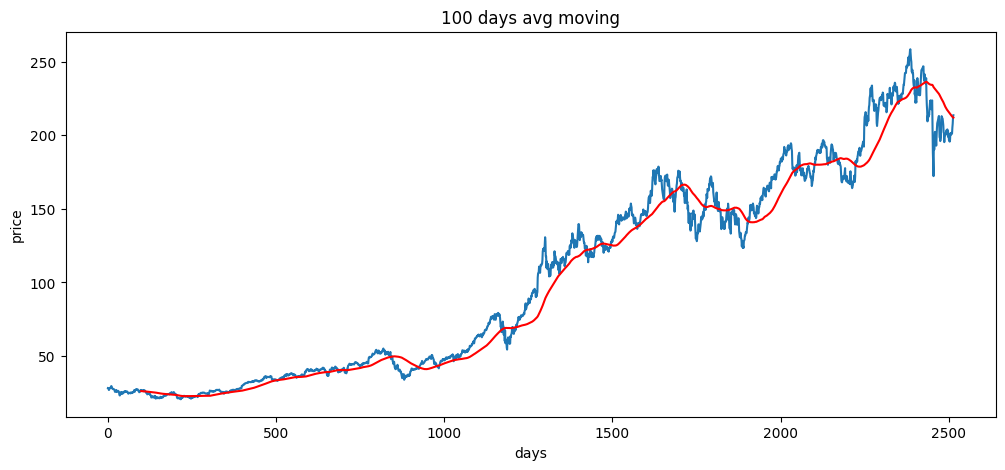

In [32]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title('100 days avg moving')
plt.xlabel('days')
plt.ylabel('price')
plt.plot(df['MA_100'],'r')

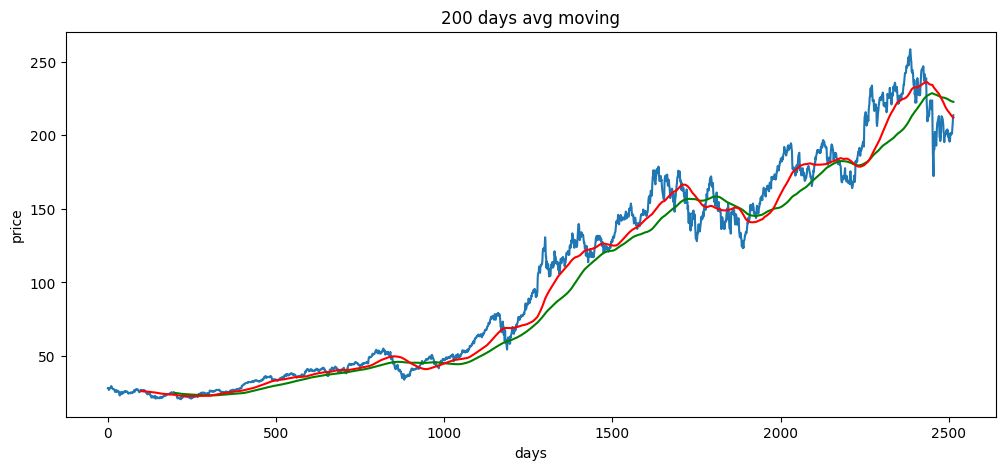

In [33]:
df['MA_200']=df.Close.rolling(200).mean()
df.head()
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title('200 days avg moving')
plt.xlabel('days')
plt.ylabel('price')
plt.plot(df['MA_200'],'g')
plt.plot(df['MA_100'],'r')

In [34]:
df['%changed']=df.Close.pct_change()
df[['Close','%changed']]

Price        Close  %changed
Ticker        AAPL          
0        28.219818       NaN
1        28.150400 -0.002460
2        27.451609 -0.024824
3        26.891701 -0.020396
4        27.610630  0.026734
...            ...       ...
2510    201.080002  0.000398
2511    205.169998  0.020340
2512    207.820007  0.012916
2513    212.440002  0.022231
2514    213.550003  0.005225

[2515 rows x 2 columns]

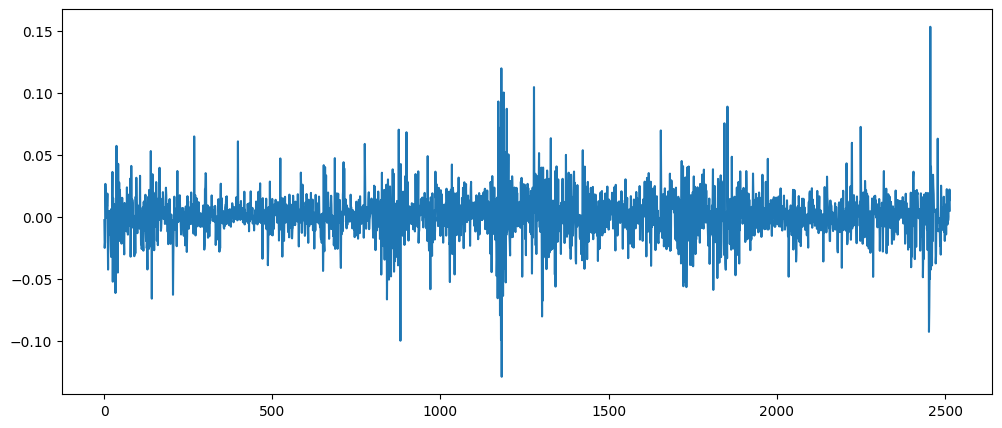

In [36]:
plt.figure(figsize=(12,5))
plt.plot(df['%changed'])

In [3]:
import yfinance as yf
from datetime import datetime

now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)

# Redownload the original data
df = yf.download("AAPL", start=start, end=now)


/var/folders/hp/3283kxw545l9z5znznglm25w0000gn/T/ipykernel_16769/3093078847.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start=start, end=now)
[*********************100%***********************]  1 of 1 completed


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = df.reset_index()
df.head()

Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2015-07-06  28.219822  28.271335  27.962260  27.982418  112241600
1      2015-07-07  28.150394  28.253419  27.720377  28.195187  187787200
2      2015-07-08  27.451612  27.915224  27.444894  27.879390  243046400
3      2015-07-09  26.891695  27.785322  26.701324  27.738289  314380000
4      2015-07-10  27.610632  27.738293  27.147021  27.310517  245418000

Text(0.5, 1.0, 'AAPL')

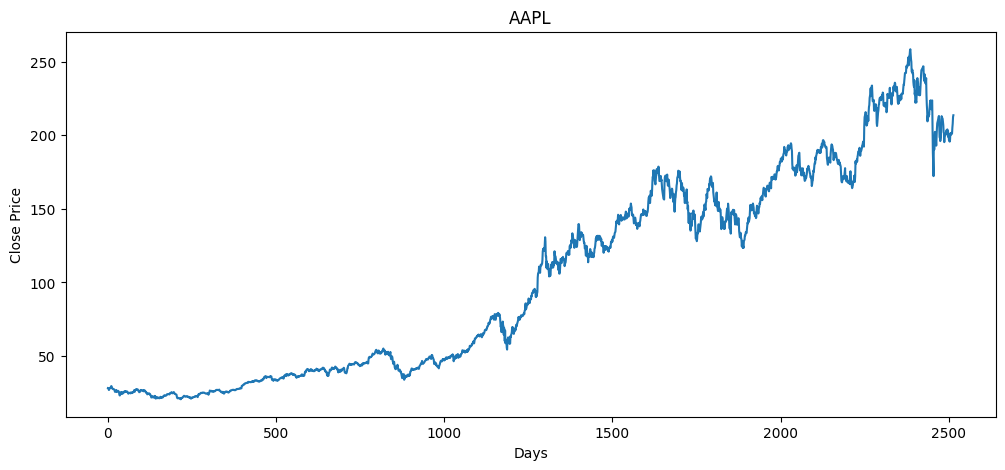

In [8]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('AAPL')

Text(0.5, 1.0, '100 Days Moving Average')

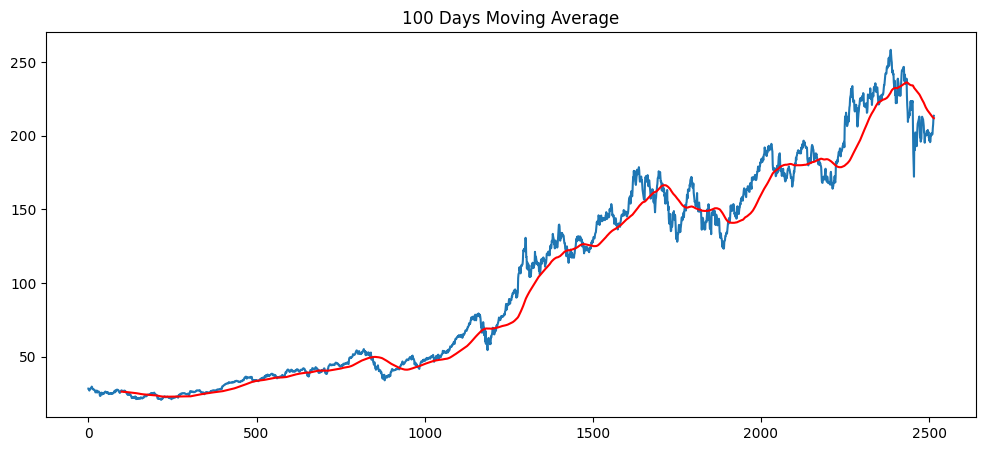

In [9]:
df['MA_100'] = df.Close.rolling(100).mean()
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r') # 'r' for red color
plt.title('100 Days Moving Average')

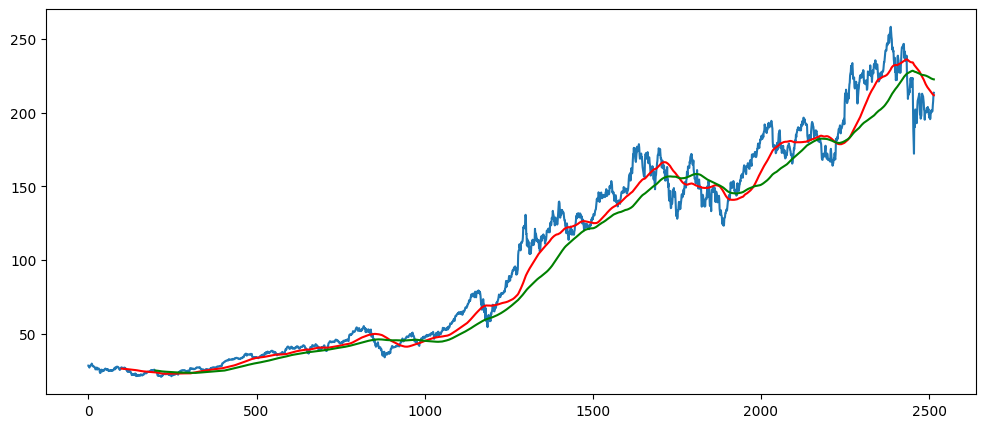

In [10]:
df['MA_200'] = df.Close.rolling(200).mean()
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r') # 'r' for red color
plt.plot(df['MA_200'], 'g') # 'r' for red color

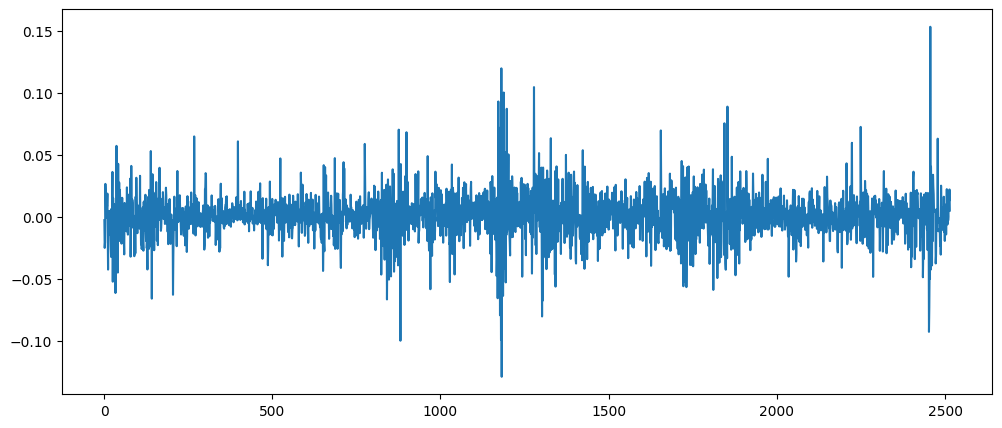

In [11]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

In [12]:
df.shape

(2515, 9)

In [13]:
df

Price        Date       Close        High         Low        Open     Volume  \
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL   
0      2015-07-06   28.219822   28.271335   27.962260   27.982418  112241600   
1      2015-07-07   28.150394   28.253419   27.720377   28.195187  187787200   
2      2015-07-08   27.451612   27.915224   27.444894   27.879390  243046400   
3      2015-07-09   26.891695   27.785322   26.701324   27.738289  314380000   
4      2015-07-10   27.610632   27.738293   27.147021   27.310517  245418000   
...           ...         ...         ...         ...         ...        ...   
2510   2025-06-27  201.080002  203.220001  200.000000  201.889999   73188600   
2511   2025-06-30  205.169998  207.389999  199.259995  202.009995   91912800   
2512   2025-07-01  207.820007  210.190002  206.139999  206.669998   78788900   
2513   2025-07-02  212.440002  213.339996  208.139999  208.910004   67941800   
2514   2025-07-03  213.550003  214.649994  211.809998  212.149994   34955800   

Price       MA_100      MA_200 Percentage Changed  
Ticker                                             
0              NaN         NaN                NaN  
1              NaN         NaN          -0.002460  
2              NaN         NaN          -0.024823  
3              NaN         NaN          -0.020397  
4              NaN         NaN           0.026735  
...            ...         ...                ...  
2510    212.760757  222.897880           0.000398  
2511    212.490059  222.827035           0.020340  
2512    212.249153  222.756735           0.012916  
2513    212.046966  222.708987           0.022231  
2514    211.911644  222.668133           0.005225  

[2515 rows x 9 columns]

In [14]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04792689],
       [0.04748747],
       [0.04306475],
       ...,
       [0.75175384],
       [0.72546651],
       [0.73661666]])

In [17]:

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    print(data_training_array[i-100: i])
    
x_train, y_train = np.array(x_train), np.array(y_train)

[[0.04792689]
 [0.04748747]
 [0.04306475]
 [0.03952092]
 [0.04407121]
 [0.04744493]
 [0.04737404]
 [0.04908924]
 [0.05148487]
 [0.05305832]
 [0.0565313 ]
 [0.05466017]
 [0.04682119]
 [0.04673618]
 [0.04580059]
 [0.04334828]
 [0.04421295]
 [0.04366007]
 [0.04278122]
 [0.04126449]
 [0.03721037]
 [0.03182377]
 [0.03290107]
 [0.03325707]
 [0.03381242]
 [0.03979294]
 [0.03092183]
 [0.03341369]
 [0.03328552]
 [0.03443895]
 [0.0361477 ]
 [0.03520785]
 [0.03308618]
 [0.02972571]
 [0.01991475]
 [0.01615554]
 [0.01703832]
 [0.02551082]
 [0.03011015]
 [0.03063701]
 [0.02988233]
 [0.02270563]
 [0.02928426]
 [0.0264791 ]
 [0.02491279]
 [0.02924158]
 [0.02616584]
 [0.02961178]
 [0.03194702]
 [0.03351338]
 [0.03489457]
 [0.03507968]
 [0.0315341 ]
 [0.03086485]
 [0.03337096]
 [0.03079363]
 [0.03210373]
 [0.03307196]
 [0.032659  ]
 [0.02942666]
 [0.02461374]
 [0.02637939]
 [0.02535416]
 [0.02649333]
 [0.02706292]
 [0.02781758]
 [0.02706292]
 [0.02524027]
 [0.028971  ]
 [0.02823054]
 [0.0285011 ]
 [0.02

In [26]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [27]:
from keras.layers import Dense, LSTM, Input
from keras.models import Sequential

model = Sequential()

# Input layer defines the shape of the data the model will receive
# (100, 1) means each input sample is a sequence of 100 time steps, 
# with 1 feature at each time step (e.g., stock closing price)
model.add(Input(shape=(100, 1)))

# First LSTM layer with 128 units, tanh activation function. Tann means Hyperbolic Tangent, this helps the network handle
# both positive and negative values, which is important when you're trying to capture patterns in sequential data.
# We also set return_sequences=True because we want this layer to return the full sequence to the next LSTM layer.
# For example, if you have a sequence of 100 time steps, and you set return_sequences=True, the LSTM layer will produce 
# an output for each of those 100 steps
model.add(LSTM(units=128, activation='tanh', return_sequences=True))

# No return_sequences means this layer outputs a single value summarizing the sequence
# Now at this point, we got the single value summarizing the sequence of output that was generated in the previous layer
model.add(LSTM(units=64))

# A Dense layer is a fully connected layer, meaning that each neuron in the layer is connected to every neuron in the previous layer. 
# These layers are typically used at the end of a neural network to transform the learned features into the final output.
model.add(Dense(25))
model.add(Dense(1))



In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0277
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 5.6739e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.6310e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 4.9952e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.3734e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.5357e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.0406e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.6080e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.4381e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.5180e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 5.0904e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.8994e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.7926e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.3574e-04
Epoch 15/50
52/52 ━

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [30]:
model.save('keras_model.keras')

In [31]:
data_training.tail(100)

Ticker        AAPL
1660    169.419037
1661    168.701645
1662    171.817001
1663    173.241974
1664    169.153687
...            ...
1755    136.086731
1756    139.423203
1757    139.423203
1758    135.269852
1759    137.031555

[100 rows x 1 columns]

In [32]:
data_testing

Ticker        AAPL
1760    134.561203
1761    136.736298
1762    139.324783
1763    140.663269
1764    144.039139
...            ...
2510    201.080002
2511    205.169998
2512    207.820007
2513    212.440002
2514    213.550003

[755 rows x 1 columns]

In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
final_df.head()

Ticker        AAPL
0       169.419037
1       168.701645
2       171.817001
3       173.241974
4       169.153687

In [36]:
input_data = scaler.fit_transform(final_df)

In [37]:
input_data.shape

(855, 1)

In [38]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [40]:
x_test.ndim

3

In [41]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [42]:
y_predicted.shape

(755, 1)

In [43]:
y_test

array([8.25332032e-02, 9.86479494e-02, 1.17825410e-01, 1.27741924e-01,
       1.52752921e-01, 1.57783925e-01, 1.41961297e-01, 1.49179792e-01,
       1.46482226e-01, 1.68211420e-01, 1.80607544e-01, 1.58002901e-01,
       1.86659490e-01, 2.01534997e-01, 2.18378907e-01, 2.09191217e-01,
       2.00878637e-01, 1.91034699e-01, 2.28878979e-01, 2.32962409e-01,
       2.70587827e-01, 2.63296189e-01, 2.52358619e-01, 2.96984235e-01,
       2.94650798e-01, 2.92971234e-01, 2.89466387e-01, 2.89831534e-01,
       3.21375725e-01, 3.15899309e-01, 3.42259203e-01, 3.50218167e-01,
       3.49049809e-01, 3.60148926e-01, 3.57227975e-01, 3.38024174e-01,
       3.09181619e-01, 3.06698958e-01, 3.08889502e-01, 3.27144146e-01,
       2.80339178e-01, 2.63982959e-01, 2.45947178e-01, 2.33606900e-01,
       2.39010399e-01, 2.23310994e-01, 2.13964810e-01, 2.24406661e-01,
       2.13453717e-01, 2.34702228e-01, 2.78951618e-01, 2.08926457e-01,
       2.19660201e-01, 1.98192601e-01, 1.85998382e-01, 2.13599549e-01,
      

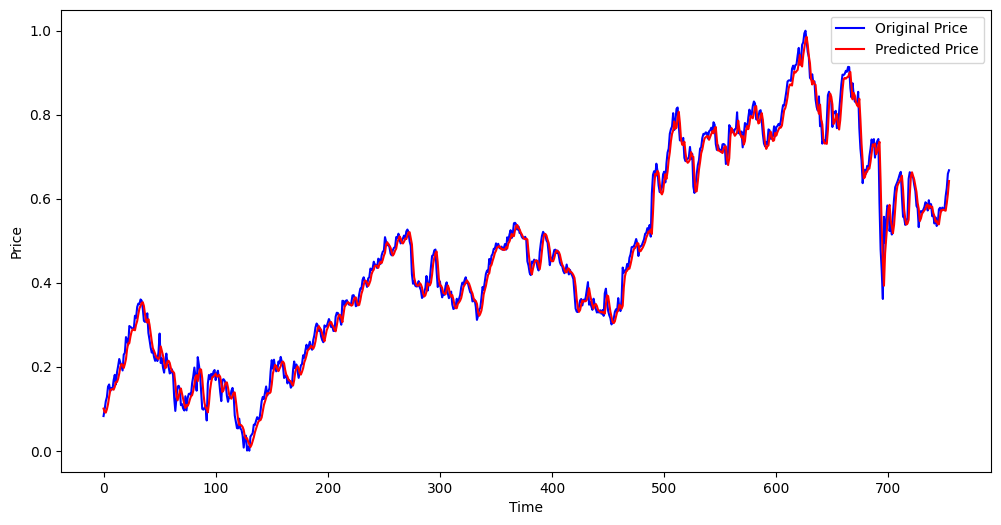

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
# plt.xlim(500, 700)
# plt.ylim(10, 25)
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.0007406212127556983


In [47]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.0272143567397008


In [48]:
r2 = r2_score(y_test, y_predicted)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9864751579942344
